In [1]:
# importing required packages 
import string
import pandas as pd
import json
import os
import twitterClient
import numpy as np
import re
import nltk
import pyLDAvis.sklearn
import math
import codecs
import matplotlib.pyplot as plt
from collections import Counter
from pandas.io.json import json_normalize
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sb
import sklearn

import itertools
import collections
from collections import Counter
from wordcloud import WordCloud
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.decomposition import LatentDirichletAllocation
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Shazad\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
path_samsung = r"C:\Users\Shazad\Documents\Social Media Assignment 2\Samsung"
path_apple = r"C:\Users\Shazad\Documents\Social Media Assignment 2\Apple"

json_files_samsung = [pos_json for pos_json in os.listdir(path_samsung) if pos_json.endswith('.json')]
json_files_apple = [pos_json for pos_json in os.listdir(path_apple) if pos_json.endswith('.json')]

In [3]:
# All the variables are declared and used furthur

tweetThres = 50
hashtags_set = []
hashtagsCounter = Counter()
client = twitterClient.twitterClient()
stemmer = PorterStemmer()
tweet = []
number_favourites = []
vs_compound = []
vs_pos = []
vs_neu = []
vs_neg = []
dates=[]
tweet1 = []
number_favourites1 = []
vs_compound1 = []
vs_pos1 = []
vs_neu1 = []
vs_neg1 = []
dates1=[]
hashtags1_set = []
hashtagsCounter1 = Counter()

hashtags_Tweets = []
hashtags_Tweets1 = []

In [4]:
df = pd.DataFrame()

for index, js in enumerate(json_files_samsung):
    with open(os.path.join(path_samsung, js)) as json_file:
        for line in json_file:
            tweet = json.loads(line)
            temp = json_normalize(tweet, sep='_')
            df = df.append(temp[['created_at','id','full_text','favorited','retweet_count','favorite_count']])
            #hashtags are counted and saved in the Counter
            entities = tweet.get('entities', {})
            user_ = tweet.get('user', {})
            hashtags = entities.get('hashtags', [])
            hashtag = [tag['text'].lower() for tag in hashtags]
            hashtags_Tweets.append(hashtag)
            df['test'] = hashtags_Tweets
            hashtagsCounter.update(hashtag)
                    

C:\Users\Shazad\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [5]:
hashtagsCounter

Counter({'samsung': 2605,
         'galaxyfold': 89,
         'djericklapeau': 1,
         'identity': 3,
         'unum': 3,
         'tron': 8,
         'instasamsung': 2,
         'instagalaxy': 2,
         'sales': 10,
         'galaxynote10plus': 122,
         'galaxynote10': 175,
         'preorder': 78,
         'whitestonedomeglass': 193,
         'screenprotector': 165,
         'note10': 72,
         'note10plus': 119,
         'bts': 33,
         'promotion': 24,
         'woven': 1,
         'office365': 1,
         'wangiriscam': 1,
         'spotify': 2,
         'squattypotty': 1,
         'iphone6': 4,
         'iphone6plus': 4,
         'ios': 27,
         'samenumber': 1,
         'galaxyfold2': 6,
         'laptop': 28,
         'programming': 3,
         'notebook': 2,
         'flash': 1,
         'intel': 6,
         'pentium': 1,
         'silver': 1,
         'processor': 1,
         'savemoney': 1,
         'sale': 5,
         'food': 1,
         'foodie': 1,
 

In [6]:
df1 = pd.DataFrame()

for index, js in enumerate(json_files_apple):
    with open(os.path.join(path_apple, js)) as json_file:
        for line in json_file:
            tweet1 = json.loads(line)
            temp = json_normalize(tweet1, sep='_')
            df1 = df1.append(temp[['created_at','id','full_text','favorited','retweet_count','favorite_count']])
            #hashtags are counted and saved in the Counter
            entities = tweet1.get('entities', {})
            user_ = tweet1.get('user', {})
            hashtags = entities.get('hashtags', [])
            hashtag = [tag['text'].lower() for tag in hashtags]
            hashtags_Tweets1.append(hashtag)
            df1['test'] = hashtags_Tweets1
            hashtagsCounter1.update(hashtag)

In [7]:
hashtagsCounter1

Counter({'watch': 19,
         'apple': 2467,
         'apples': 28,
         'tech': 223,
         'teambossygals': 4,
         'love': 13,
         'flavonoids': 60,
         'kobo': 33,
         'nook': 9,
         'arcade': 25,
         'inmost': 23,
         'boycottapple': 8,
         'mary': 1,
         'wsj': 2,
         'ipadpro': 14,
         'ipad': 75,
         'ipados': 20,
         'iphone11': 76,
         'iphone11pro': 66,
         'iphone11promax': 49,
         'iphoneonly': 3,
         'appledesign': 2,
         'appleaccessories': 1,
         'carplay': 3,
         'ios13': 63,
         'swigcru': 1,
         'investasi': 1,
         'stevejobs': 23,
         'netflix': 23,
         'iphone': 297,
         'mac': 46,
         'minimal': 4,
         'hongkongprotest': 14,
         'diabetes': 1,
         'typeonediabetes': 1,
         't1d': 1,
         'instagram': 17,
         'selfie': 2,
         'instagramselfie': 1,
         'typeonediabetic': 1,
         'apple

### Preprocessing and Data Cleaning

In [8]:
#Convert the text to lower cases
df['tidy_tweet'] = df['full_text'].map(lambda x: x.lower())
df1['tidy_tweet'] = df1['full_text'].map(lambda x: x.lower())

In [9]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [10]:
#Removing the user mentions in the tweet
df['tidy_tweet'] = np.vectorize(remove_pattern)(df['tidy_tweet'], "@[\w]*")
df1['tidy_tweet'] = np.vectorize(remove_pattern)(df1['tidy_tweet'], "@[\w]*")

<>:2: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
<ipython-input-10-59bfad7eb04f>:2: DeprecationWarning: invalid escape sequence \w
  df['tidy_tweet'] = np.vectorize(remove_pattern)(df['tidy_tweet'], "@[\w]*")
<ipython-input-10-59bfad7eb04f>:3: DeprecationWarning: invalid escape sequence \w
  df1['tidy_tweet'] = np.vectorize(remove_pattern)(df1['tidy_tweet'], "@[\w]*")


In [11]:
#Removing the Hashtags in the tweet
df['tidy_tweet'] = np.vectorize(remove_pattern)(df['tidy_tweet'], "#[\w]*")
df1['tidy_tweet'] = np.vectorize(remove_pattern)(df1['tidy_tweet'], "#[\w]*")

<>:2: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
<ipython-input-11-46d06fd03a32>:2: DeprecationWarning: invalid escape sequence \w
  df['tidy_tweet'] = np.vectorize(remove_pattern)(df['tidy_tweet'], "#[\w]*")
<ipython-input-11-46d06fd03a32>:3: DeprecationWarning: invalid escape sequence \w
  df1['tidy_tweet'] = np.vectorize(remove_pattern)(df1['tidy_tweet'], "#[\w]*")


In [12]:
#Removing the Https in the tweets
df['tidy_tweet'] = np.vectorize(remove_pattern)(df['tidy_tweet'], "( \w+:\/\/\S+)")
df1['tidy_tweet'] = np.vectorize(remove_pattern)(df1['tidy_tweet'], "( \w+:\/\/\S+)")

<>:2: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
<ipython-input-12-6d3d8228cc9f>:2: DeprecationWarning: invalid escape sequence \w
  df['tidy_tweet'] = np.vectorize(remove_pattern)(df['tidy_tweet'], "( \w+:\/\/\S+)")
<ipython-input-12-6d3d8228cc9f>:3: DeprecationWarning: invalid escape sequence \w
  df1['tidy_tweet'] = np.vectorize(remove_pattern)(df1['tidy_tweet'], "( \w+:\/\/\S+)")


In [13]:
#Removing the Stopwords from the tweets
lStopwords = stopwords.words('english') + ['rt', 'via', '...', '…', '"', "'", '`','https','http']
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (lStopwords)]))

In [14]:
#Removing the Stopwords from the tweets
lStopwords = stopwords.words('english') + ['rt', 'via', '...', '…', '"', "'", '`','https','http']
df1['tidy_tweet'] = df1['tidy_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (lStopwords)]))

In [15]:
#Tokenization is done and saved into dataframe
tokenized_tweet = df['tidy_tweet'].apply(lambda x: x.split())

df['tidy_tweet'] = tokenized_tweet.to_frame()

df['strTweets'] = df['tidy_tweet'].apply(lambda x: ' '.join(map(str, x)))

In [16]:
#Tokenization is done and saved into dataframe
tokenized_tweet = df1['tidy_tweet'].apply(lambda x: x.split())

df1['tidy_tweet'] = tokenized_tweet.to_frame()

df1['strTweets'] = df1['tidy_tweet'].apply(lambda x: ' '.join(map(str, x)))

In [17]:
#head of the dataframe is displayed
df1.head()

,created_at,favorite_count,favorited,full_text,id,retweet_count,test,tidy_tweet,strTweets
0,Sun Oct 13 02:46:04 +0000 2019,0,False,Samsung’s Galaxy Watch Active 2 is a solid sma...,1183212277480116225,0,"[watch, apple, apples, tech]","[samsung’s, galaxy, watch, active, 2, solid, s...",samsung’s galaxy watch active 2 solid smartwat...
0,Sun Oct 13 02:46:02 +0000 2019,0,False,Caramel Apple Pie Bombs 5 Ingredient Breakfa...,1183212270442205184,0,[apple],"[caramel, apple, pie, bombs, 5, ingredient, br...",caramel apple pie bombs 5 ingredient breakfast...
0,Sun Oct 13 02:45:21 +0000 2019,0,False,❤R∈TW∈∈T if you NEED MORE FOLLOWERS❤ Join #Tea...,1183212098593214465,0,"[teambossygals, love, apple]","[❤r∈tw∈∈t, need, followers❤, join, share, ➽]",❤r∈tw∈∈t need followers❤ join share ➽
0,Sun Oct 13 02:44:45 +0000 2019,0,False,RT @FrontiersIn: To the heroes among you who e...,1183211947598041088,335,"[apple, flavonoids]","[:, heroes, among, eat, whole, :, besides, ext...",: heroes among eat whole : besides extra fiber...
0,Sun Oct 13 02:44:07 +0000 2019,0,False,It's on pre-order at certain online bookstores...,1183211784473325568,0,"[apple, kobo, nook]","[pre-order, certain, online, bookstores, 0.99....",pre-order certain online bookstores 0.99. merc...


In [18]:
import emoji

In [19]:
def extract_emojis(token):
    token = token.split(" ")
    emoji_list = []
    for tok in token:
        if tok in emoji.UNICODE_EMOJI:
            emoji_list.append(tok)
    return emoji_list

In [20]:
emojis = []
for i in df['strTweets']:
    abc = extract_emojis(i)
    if len(abc) !=0:
        for emo in abc:
            emojis.append(str(emo))
print(emojis)

['😍', '🦅', '🎧', '1️⃣', '2️⃣', '🤣', '😍', '😍', '👉', '👇', '😍', '💪🏻', '😎', '😉', '🤩', '👍', '⭐', '⭐', '😁', '📍', '😁', '😍', '🇭🇺', '😉', '🇧🇪', '😁', '🤔', '😉', '🌃', '📸', '😁', '💚', '👉', '💎', '💎', '😁', '📱', '📱', '📱', '💤', '😍', '💎', '💎', '🙏🏻', '😁', '🙏🏻', '😉', '😉', '😉', '💤', '😍', '🔥', '😉', '1️⃣', '2️⃣', '🙂', '😁', '😁', '1️⃣', '2️⃣', '🔥', '😍', '🤷🏽\u200d♂️', '📣', '😁', '🙂', '🔥', '🇭🇺', '😍', '📣', '😍', '📣', '😍', '🤾\u200d♂️', '🌹', '😍', '📱', '🛡', '🛡', '🇧🇪', '👉', '1️⃣', '2️⃣', '💤', '😍', '💤', '🔦', '📣', '🎥', '👍', '💤', '😜', '😍', '📱', '🔥', '😍', '😍', '😍', '💎', '⚡', '📱', '💎', '⚡', '📱', '💎', '⚡', '📱', '💎', '⚡', '📱', '🙏🏾', '📱', '🔥', '😍', '📸', '📍', '📸', '📍', '😍', '🤓', '🤓', '💫', '💎', '💎', '👎', '💎', '💎', '🌎', '➕', '🤷\u200d♀️', '😍', '🙌', '😍', '😍', '📱', '📱', '🤛🏼', '🔥', '😍', '🍻', '🔦', '🌌', '📲', '🥰', '😍', '👀', '🤬', '📸', '📍', '😆', '😍', '👈', '📱', '1️⃣', '😍', '📱', '⏰', '🇭🇺', '🤣', '🔦', '🌅', '📍', '📱', '🔥', '🔥', '📱', '🔥', '🔦', '💰', '📷', '🔥', '😉', '📲', '🔦', '🤦\u200d♂️', '💕', '🤬', '🔦', '💎', '💎', '💋', '📱', '💎', '💎', '😑', '🔥', '🔥', '💎'

In [21]:
emojis1 = []
for i in df1['strTweets']:
    abc1 = extract_emojis(i)
    if len(abc1) !=0:
        for emo in abc1:
            emojis1.append(str(emo))
print(emojis1)

['👏', '👏', '🙏', '®', '🔄', '👉', '👉', '👉', '🎵', '😉', '📷', '®', '®', '😢', '😢', '😉', '👌', '🔄', '👉', '👉', '👉', '🎵', '✌', '🔄', '👉', '👉', '👉', '🎵', '🍎', '🔥', '😡', '🙏🏻', '🥳', '🥳', '🔄', '👉', '👉', '👉', '🎵', '✌', '🎃', '🥁', '🎉', '🎉', '🔄', '👉', '👉', '👉', '🎵', '🔄', '👉', '👉', '👉', '🎵', '😡', '🐈', '🍎', '📷', '🤷🏻\u200d♀️', '✅', '🍁', '🙏🏾', '®', '®', '🌉', '🌉', '🔄', '👉', '👉', '👉', '🎵', '😉', '💃🏼', '🍎', '🍎', '🥧', '🍻', '🎃', '🍏', '😪', '👽', '🍎', '🥃', '🔄', '👉', '👉', '👉', '🎵', '🍎', '🤷🏽\u200d♀️', '🍏', '®', '🍎', '🍎', '🇮🇪', '🤬', '🔄', '👉', '👉', '👉', '🎵', '®', '🍎', '😂', '\U0001f971', '🎉', '🍁', '😩', '🤗', '🇩🇪', '👌🏻', '😝', '😂', '😊', '🔄', '👉', '👉', '👉', '🎵', '🍎', '🍎', '👉🏻', '🌑', '😆', '📱', '📱', '🤦\u200d♂️', '🤔', '📱', '📱', '🔄', '👉', '👉', '👉', '🎵', '💰', '📱', '💰', '👎🏼', '🔄', '👉', '👉', '👉', '🎵', '™', '🥳', '🔄', '👉', '👉', '👉', '🎵', '🔄', '👉', '👉', '👉', '🎵', '🏈', '😁', '🔄', '👉', '👉', '👉', '🎵', '🍁', '✌🏽', '😁', '🔄', '👉', '👉', '👉', '🎵', '😊', '😅', '🔄', '👉', '👉', '👉', '🎵', '🔄', '👉', '👉', '👉', '🎵', '🔄', '👉', '👉', '👉', '🎵', '👌', '🔄', '👉', 

In [22]:
emoji_in_counter=[]
count_in_counter=[]
counter_df = pd.DataFrame
emoji_counter = Counter()
emoji_counter.update(emojis)
for emo, count in emoji_counter.most_common(50):
    print(emo, " : ", count, " : ", emoji.demojize(emo).replace(':', ''))
    if emoji.demojize(emo).replace(':', '') in ['OK_hand', 'rolling_on_the_floor_laughing', 'thumbs_up', 'red_heart','face_with_symbols_on_mouth', 'fire', 'winking_face']:
        emoji_in_counter.append((emoji.demojize(emo)).replace(':', ''))
        count_in_counter.append(count)

counter_df = counter_df({'name':emoji_in_counter,'count':count_in_counter})

😍  :  59  :  smiling_face_with_heart-eyes
🔥  :  29  :  fire
📱  :  24  :  mobile_phone
💎  :  20  :  gem_stone
🇭🇺  :  12  :  Hungary
😁  :  10  :  beaming_face_with_smiling_eyes
😉  :  9  :  winking_face
👉  :  8  :  backhand_index_pointing_right
🔦  :  6  :  flashlight
⚡  :  6  :  high_voltage
🤬  :  6  :  face_with_symbols_on_mouth
🧢  :  6  :  billed_cap
1️⃣  :  5  :  keycap_1
🤩  :  5  :  star-struck
📍  :  5  :  round_pushpin
💤  :  5  :  zzz
🙌  :  5  :  raising_hands
2️⃣  :  4  :  keycap_2
📸  :  4  :  camera_with_flash
📣  :  4  :  megaphone
👌  :  4  :  OK_hand
💯  :  4  :  hundred_points
🤣  :  3  :  rolling_on_the_floor_laughing
😎  :  3  :  smiling_face_with_sunglasses
🇧🇪  :  3  :  Belgium
🙂  :  3  :  slightly_smiling_face
👀  :  3  :  eyes
🆕  :  3  :  NEW_button
💵  :  3  :  dollar_banknote
👍  :  2  :  thumbs_up
⭐  :  2  :  white_medium_star
🙏🏻  :  2  :  folded_hands_light_skin_tone
🛡  :  2  :  shield
🤓  :  2  :  nerd_face
👎  :  2  :  thumbs_down
📲  :  2  :  mobile_phone_with_arrow
💕  :  2  :

In [23]:
emoji_in_counter1=[]
count_in_counter1=[]
counter_df1 = pd.DataFrame
emoji_counter1 = Counter()
emoji_counter1.update(emojis1)
for emo, count in emoji_counter1.most_common(50):
    print(emo, " : ", count, " : ", emoji.demojize(emo).replace(':', ''))
    if emoji.demojize(emo).replace(':', '') in ['OK_hand', 'rolling_on_the_floor_laughing', 'thumbs_up', 'red_heart','face_with_symbols_on_mouth', 'fire', 'winking_face']:
        emoji_in_counter1.append((emoji.demojize(emo)).replace(':', ''))
        count_in_counter1.append(count)
counter_df1 = counter_df1({'name':emoji_in_counter1,'count':count_in_counter1})

👉  :  74  :  backhand_index_pointing_right
🔄  :  24  :  counterclockwise_arrows_button
🎵  :  24  :  musical_note
®  :  15  :  registered
🍎  :  14  :  red_apple
🥁  :  13  :  drum
😱  :  7  :  face_screaming_in_fear
📱  :  6  :  mobile_phone
❓  :  6  :  question_mark
🥳  :  5  :  partying_face
🎃  :  5  :  jack-o-lantern
✅  :  5  :  white_heavy_check_mark
🍁  :  5  :  maple_leaf
😉  :  4  :  winking_face
🙏🏻  :  4  :  folded_hands_light_skin_tone
🤬  :  4  :  face_with_symbols_on_mouth
😂  :  4  :  face_with_tears_of_joy
👏  :  3  :  clapping_hands
🔥  :  3  :  fire
🎉  :  3  :  party_popper
🍏  :  3  :  green_apple
🤷🏽‍♀️  :  3  :  woman_shrugging_medium_skin_tone
💰  :  3  :  money_bag
🤣  :  3  :  rolling_on_the_floor_laughing
👍  :  3  :  thumbs_up
🙏  :  2  :  folded_hands
📷  :  2  :  camera
😢  :  2  :  crying_face
👌  :  2  :  OK_hand
✌  :  2  :  victory_hand
😡  :  2  :  pouting_face
🌉  :  2  :  bridge_at_night
😊  :  2  :  smiling_face_with_smiling_eyes
🤦‍♂️  :  2  :  man_facepalming
😁  :  2  :  beam

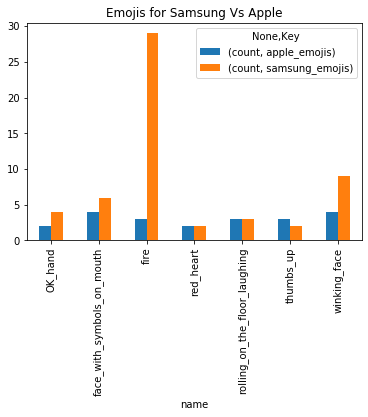

In [24]:
# Bar graph comparing the count of common emojis
counter_df['Key'] = 'samsung_emojis'
counter_df1['Key'] = 'apple_emojis'

common_emojis = pd.concat([counter_df, counter_df1], keys=['samsung_emojis', 'apple_emojis'])

com_emo_group = common_emojis.groupby(['name','Key'])

DFGPlot = com_emo_group.sum().unstack('Key').plot(kind='bar', title ='Emojis for Samsung Vs Apple')

### Hashtag Visualization

In [25]:
# Counter is used to get the hashtags and stored into dataframe
df_hash = pd.DataFrame.from_dict(hashtagsCounter, orient='index').reset_index()
df_hash = df_hash.rename(columns={'index':'Hashtags', 0:'count'})
df_hash=df_hash.sort_values(by=['count'], ascending=False)

In [26]:
# Counter is used to get the hashtags and stored into dataframe
df_hash1 = pd.DataFrame.from_dict(hashtagsCounter1, orient='index').reset_index()
df_hash1 = df_hash1.rename(columns={'index':'Hashtags', 0:'count'})
df_hash1=df_hash1.sort_values(by=['count'], ascending=False)

<Figure size 1080x720 with 0 Axes>

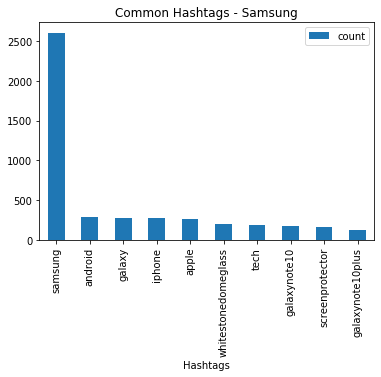

In [27]:
plt.figure(figsize=(15,10))
df_hash.head(10).plot(title='Common Hashtags - Samsung',x='Hashtags', y='count', align='center', kind='bar')
plt.show()

<Figure size 1080x720 with 0 Axes>

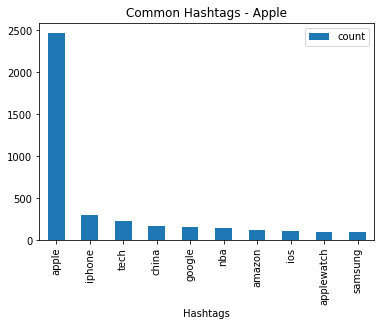

In [28]:
plt.figure(figsize=(15,10))
df_hash1.head(10).plot(title='Common Hashtags - Apple',x='Hashtags', y='count', align='center', kind='bar')
plt.show()

In [29]:
# Freq count of each hash tags are displayed
for tag, count in hashtagsCounter.most_common(tweetThres):
    print(tag + ": " + str(count))

samsung: 2605
android: 287
galaxy: 270
iphone: 269
apple: 263
whitestonedomeglass: 193
tech: 191
galaxynote10: 175
screenprotector: 165
galaxynote10plus: 122
note10plus: 119
technology: 119
google: 118
mobile: 114
huawei: 103
smartphone: 102
phone: 98
samsunggalaxy: 91
galaxyfold: 89
free: 85
wallpapers: 82
preorder: 78
background: 77
walls: 77
ipad: 74
note10: 72
smartwatch: 65
iphone11: 64
gadgets: 62
galaxys10: 60
deals: 58
xiaomi: 55
homescreen: 55
abstractart: 52
iphone11pro: 51
wallpaper: 51
electronics: 50
abstract: 48
news: 46
deal: 44
smartphones: 43
ripple: 42
lg: 41
galaxynote9: 40
case: 39
discount: 38
oppo: 38
technews: 37
fortnite: 35
amazon: 34


In [30]:
# Freq count of each hash tags are displayed
for tag, count in hashtagsCounter1.most_common(tweetThres):
    print(tag + ": " + str(count))

apple: 2467
iphone: 297
tech: 223
china: 163
google: 161
nba: 150
amazon: 116
ios: 111
applewatch: 103
samsung: 101
music: 100
hongkong: 83
itunes: 78
android: 77
iphone11: 76
ipad: 75
blizzard: 72
macos: 69
spotify: 68
technology: 68
iphone11pro: 66
macbook: 66
ios13: 63
art: 61
catalina: 61
flavonoids: 60
oneplus: 54
soundcloud: 50
iphone11promax: 49
win: 49
airpods: 49
giveaways: 48
criticalops: 47
free: 47
mac: 46
facebook: 40
phone: 38
espn: 37
technews: 37
smartphone: 36
mobile: 36
huawei: 35
standwithhongkong: 35
microsoft: 35
device: 34
popart: 34
kobo: 33
techno: 32
beatport: 32
asmsg: 31


In [31]:
def produceCoocurranceHeatmap(listOfHashtags, hashtagcounter):
    tweetHashtagList = listOfHashtags
    
    #hashtagFreqCounter = collections.Counter(list(itertools.chain.from_iterable(listOfHashtags)))
    vectors = []
    
    filteredHashtags = [i for i in tweetHashtagList if i]
    mostCommon = list(dict(hashtagcounter.most_common(30)).keys())

    for i in filteredHashtags:
        vectors.append([0] * 30)
        for tag in i:
            if tag in mostCommon:
                vectors[-1][mostCommon.index(tag)] = 1

    dfHeat = pd.DataFrame(vectors, columns = mostCommon)
    # dfHeat.head()

    dfHeatFl = dfHeat.T.dot(dfHeat)
    dfHeatFl.head()

    # plot the correlation matrix
    plt.figure(figsize=(10,10))
    sns.heatmap(dfHeatFl,
        cmap= 'gist_heat_r',
#         vmin=-1,
        vmax = 100,
        square = True,
        cbar_kws={'label':'correlation'})
    plt.show();

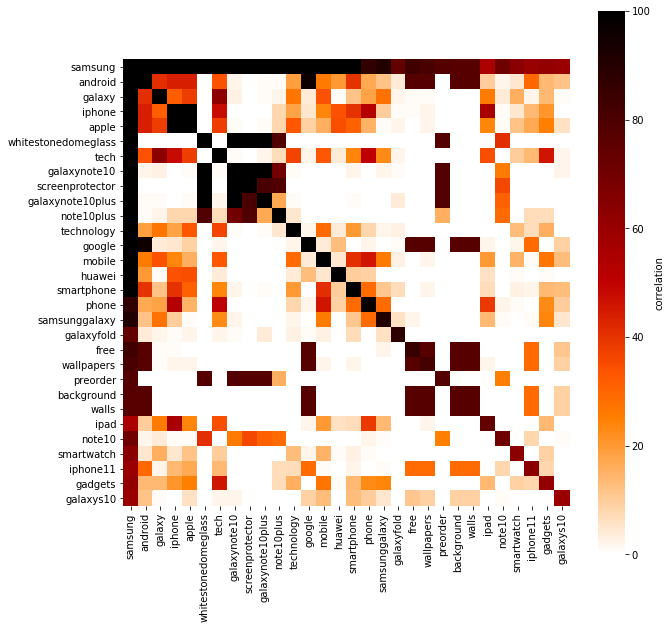

In [32]:
produceCoocurranceHeatmap(df['test'], hashtagsCounter)

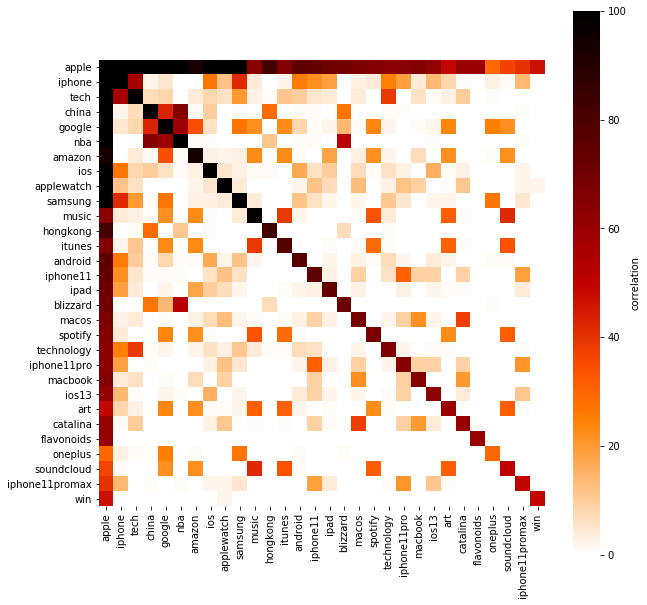

In [33]:
produceCoocurranceHeatmap(df1['test'], hashtagsCounter1)

### Sentimental Analysis using Vader

In [34]:
#Iteration is done to fetch each tweet and then appending into new dataframe
tweet = []
dates = []
number_favourites = []
vs_pos = []
vs_neu = []
vs_neg = []

analyzer = SentimentIntensityAnalyzer()
for i in range(0, len(df)):
    tweet.append(df['strTweets'].iloc[i])
    dates.append(df['created_at'].iloc[i])
    number_favourites.append(df['favorite_count'].iloc[i])
    vs_compound.append(analyzer.polarity_scores(df['strTweets'].iloc[i])['compound'])
    vs_pos.append(analyzer.polarity_scores(df['strTweets'].iloc[i])['pos'])
    vs_neu.append(analyzer.polarity_scores(df['strTweets'].iloc[i])['neu'])
    vs_neg.append(analyzer.polarity_scores(df['strTweets'].iloc[i])['neg'])


from pandas import Series, DataFrame

twitter_df = DataFrame({'Tweet': tweet,
                        'Date' : dates,
                        'Favourites': number_favourites,
                        'Compound': vs_compound,
                        'Positive': vs_pos,
                        'Neutral': vs_neu,
                        'Negative': vs_neg})
twitter_df = twitter_df[['Tweet','Date', 'Favourites', 'Compound',
                         'Positive', 'Neutral', 'Negative']]

# Have a look at the top 5 results.
twitter_df.head()



,Tweet,Date,Favourites,Compound,Positive,Neutral,Negative
0,"ready, set let’s go launch crown 50 bowery",Thu Oct 10 00:21:57 +0000 2019,0,0.3612,0.263,0.737,0.0
1,: take back id,Thu Oct 10 00:20:53 +0000 2019,0,0.0000,0.000,1.000,0.0
2,": samsung galaxy family, check (https://t.co/j...",Thu Oct 10 00:20:11 +0000 2019,0,0.0000,0.000,1.000,0.0
3,"see latest tucson, az job opportunity click li...",Thu Oct 10 00:15:11 +0000 2019,0,0.4215,0.167,0.833,0.0
4,new glass screen protector 😍 🔥pre-order dome g...,Thu Oct 10 00:15:05 +0000 2019,0,0.7088,0.312,0.688,0.0


In [35]:
tweet1 = []
dates1 = []
number_favourites1 = []
vs_pos1 = []
vs_neu1 = []
vs_neg1 = []

for i in range(0, len(df1)):
    tweet1.append(df1['strTweets'].iloc[i])
    dates1.append(df1['created_at'].iloc[i])
    number_favourites1.append(df['favorite_count'].iloc[i])
    vs_compound1.append(analyzer.polarity_scores(df1['strTweets'].iloc[i])['compound'])
    vs_pos1.append(analyzer.polarity_scores(df1['strTweets'].iloc[i])['pos'])
    vs_neu1.append(analyzer.polarity_scores(df1['strTweets'].iloc[i])['neu'])
    vs_neg1.append(analyzer.polarity_scores(df1['strTweets'].iloc[i])['neg'])

from pandas import Series, DataFrame

twitter_df1 = DataFrame({'Tweet': tweet1,
                        'Date' : dates1,
                        'Favourites': number_favourites1,
                        'Compound': vs_compound1,
                        'Positive': vs_pos1,
                        'Neutral': vs_neu1,
                        'Negative': vs_neg1})
twitter_df1 = twitter_df1[['Tweet','Date', 'Favourites', 'Compound',
                         'Positive', 'Neutral', 'Negative']]

# Have a look at the top 5 results.
twitter_df1.head()

,Tweet,Date,Favourites,Compound,Positive,Neutral,Negative
0,samsung’s galaxy watch active 2 solid smartwat...,Sun Oct 13 02:46:04 +0000 2019,0,0.5106,0.350,0.650,0.000
1,caramel apple pie bombs 5 ingredient breakfast...,Sun Oct 13 02:46:02 +0000 2019,0,0.3612,0.185,0.815,0.000
2,❤r∈tw∈∈t need followers❤ join share ➽,Sun Oct 13 02:45:21 +0000 2019,0,0.5267,0.595,0.405,0.000
3,: heroes among eat whole : besides extra fiber...,Sun Oct 13 02:44:45 +0000 2019,0,0.5106,0.202,0.798,0.000
4,pre-order certain online bookstores 0.99. merc...,Sun Oct 13 02:44:07 +0000 2019,0,0.2942,0.248,0.630,0.122


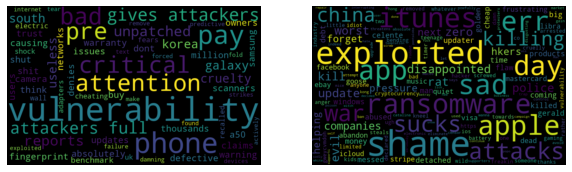

In [36]:
negative_words = ' '.join([text for text in twitter_df['Tweet'][twitter_df['Negative'] >= 0.5]])
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(negative_words)

negative_words1 = ' '.join([text for text in twitter_df1['Tweet'][twitter_df1['Negative'] >= 0.5]])
wordcloud1 = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words1)


fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2,1)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
fig.add_subplot(1, 2,2)
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis('off')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F5066C1D0>]],
      dtype=object)

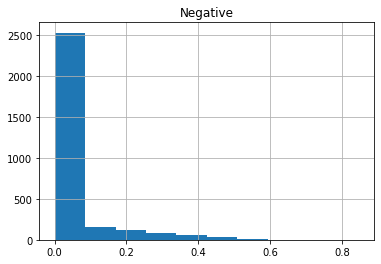

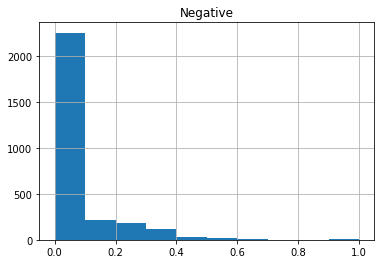

In [37]:
#Negative Sentiment plotted
twitter_df.hist(column='Negative', bins=10)
#Negative Sentiment plotted
twitter_df1.hist(column='Negative', bins=10)

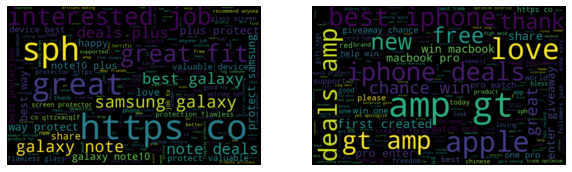

In [38]:
postivewords = ' '.join([text for text in twitter_df['Tweet'][twitter_df['Positive'] >= 0.5]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(postivewords)

postivewords1 = ' '.join([text for text in twitter_df1['Tweet'][twitter_df1['Positive'] >= 0.5]])
wordcloud1 = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(postivewords1)


fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2,1)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
fig.add_subplot(1, 2,2)
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis('off')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F50EA44E0>]],
      dtype=object)

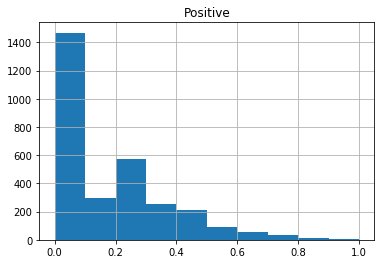

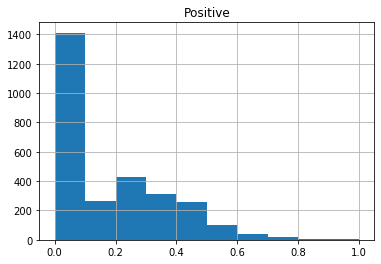

In [39]:
#Positive Sentiment plotted
twitter_df.hist(column='Positive', bins=10)
#Positive Sentiment plotted
twitter_df1.hist(column='Positive', bins=10)

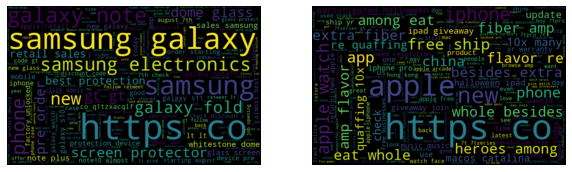

In [40]:
neutralwords = ' '.join([text for text in twitter_df['Tweet'][twitter_df['Neutral'] >= 0.5]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(neutralwords)

neutralwords1 = ' '.join([text for text in twitter_df1['Tweet'][twitter_df1['Neutral'] >= 0.5]])
wordcloud1 = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(neutralwords1)


fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2,1)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
fig.add_subplot(1, 2,2)
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis('off')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F50ECD128>]],
      dtype=object)

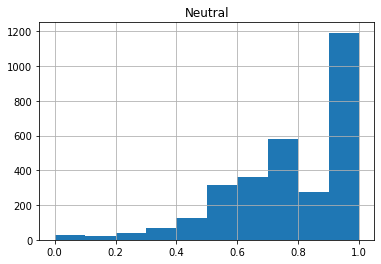

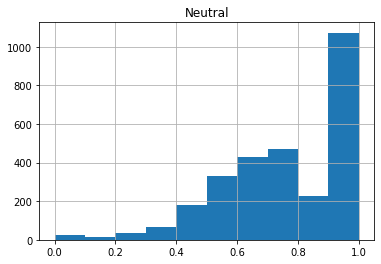

In [41]:
#Neutral Sentiment plotted
twitter_df.hist(column='Neutral', bins=10)
#Neutral Sentiment plotted
twitter_df1.hist(column='Neutral', bins=10)

In [42]:
#Describes the sentiment of the Tweets
twitter_df.describe()


,Favourites,Compound,Positive,Neutral,Negative
count,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000
mean,1.134134,0.203931,0.165403,0.787080,0.039509
std,8.670348,0.364154,0.196382,0.218146,0.103176
min,0.000000,-0.936100,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.648000,0.000000
50%,0.000000,0.000000,0.119000,0.793000,0.000000
75%,0.000000,0.476700,0.278000,1.000000,0.000000
max,286.000000,0.954500,1.000000,1.000000,0.848000


In [43]:
twitter_df1.describe()

,Favourites,Compound,Positive,Neutral,Negative
count,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000
mean,1.058307,0.172407,0.166068,0.771427,0.057588
std,7.078327,0.385532,0.193034,0.219359,0.126307
min,0.000000,-0.932300,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.621000,0.000000
50%,0.000000,0.000000,0.108000,0.779000,0.000000
75%,0.000000,0.510600,0.308000,1.000000,0.000000
max,185.000000,0.967800,1.000000,1.000000,1.000000


### Time Series with Sentimental Analysis

In [44]:
#Creating a New Dataframe for Timeseries of sentiment
analysis = DataFrame({'Date': twitter_df['Date'],
                        'sentiment' : twitter_df['Compound']})

#Creating a New Dataframe for Timeseries of sentiment
analysis1 = DataFrame({'Date': twitter_df1['Date'],
                        'sentiment' : twitter_df1['Compound']})

In [45]:
analysis['Date'] = pd.to_datetime(analysis['Date'])
analysis1['Date'] = pd.to_datetime(analysis1['Date'])

In [46]:
analysis.set_index('Date', inplace=True)
analysis1.set_index('Date', inplace=True)

In [47]:
analysis[['sentiment']] = analysis[['sentiment']].apply(pd.to_numeric)
analysis1[['sentiment']] = analysis1[['sentiment']].apply(pd.to_numeric)


C:\Users\Shazad\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  
C:\Users\Shazad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Shazad\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Shazad\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


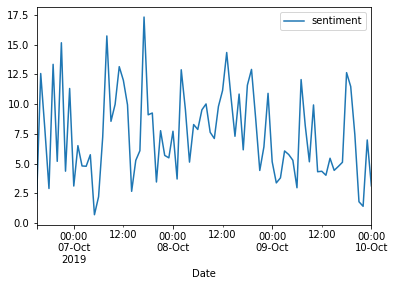

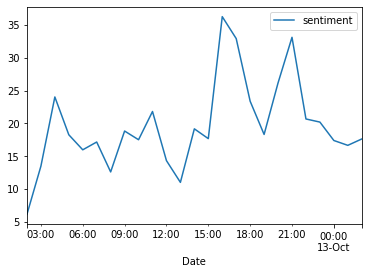

In [48]:
#Time Series Plot is plotted across the months
newSeries = analysis.resample('1H', how='sum')
newSeries1 = analysis1.resample('1H', how='sum')

newSeries.plot()
newSeries1.plot()

plt.show()

### Topic Modelling

In [49]:
# maximum number of words to display per topic (default = 10)
topicNum = 10
# this is the number of features/words to used to describe our documents
wordNumToDisplay = 15
featureNum = 1500

In [50]:
tfVectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum)
tf = tfVectorizer.fit_transform(df['strTweets'])
tf1 = tfVectorizer.fit_transform(df1['strTweets'])
tfFeatureNames = tfVectorizer.get_feature_names()
tfFeatureNames1 = tfVectorizer.get_feature_names()

# LDA Model
ldaModel = LatentDirichletAllocation(n_components = topicNum, max_iter=10, learning_method='batch',random_state=1000).fit(tf)
ldaModel1 = LatentDirichletAllocation(n_components = topicNum, max_iter=10, learning_method='batch',random_state=1000).fit(tf1)

In [51]:
#Display the topics for LDA Model
def display_topics(model, featureNames, numTopWords):

    # print out the topic distributions
    for topicId, lTopicDist in enumerate(model.components_):
        print("Topic %d:" % (topicId))
        print(" ".join([featureNames[i] for i in lTopicDist.argsort()[:-numTopWords - 1:-1]]))

In [52]:
display_topics(ldaModel, tfFeatureNames, wordNumToDisplay)

Topic 0:
pic changer interesting communist hot see cleaning apple user muffins sit models mourn redmi may
Topic 1:
functions see grow look hot communist upgrade learn somebody fixed apple fire 99 gray cards
Topic 2:
much functions nothing apps wearable watching cost see song used trending 100 uninstall save us
Topic 3:
functions 08 name see police glasses whole hot design communist re dead products watching india
Topic 4:
see doesn functions second iphone11 keeps rings recording web command communist high fire audience hot
Topic 5:
hot communist see functions watching ad tweet nike ux collect distance ios road fire attacks
Topic 6:
functions see might user view song apps pic winning spend looked foreign tracker 5am go
Topic 7:
blue series grow 08 glasses much functions pumpkin officers general prevent dead providing psa police
Topic 8:
see much launched videos storage deal cuddling censor hotspot4u plus verizon signal information tracking picking
Topic 9:
much reportedly new general io

In [53]:
display_topics(ldaModel1, tfFeatureNames1, wordNumToDisplay)

Topic 0:
free need also get revolution businesses apple audio in shame day make apples kneel gadget
Topic 1:
like us iphone apple 11 check read first china companies one much ccp world chapter
Topic 2:
app police apple used removes track hong iphone kong next protesters china attacks more 11
Topic 3:
amp apple free you re ship many whole eat extra among flavor besides 10x fiber
Topic 4:
gt amp iphone 2019 watch buy 12 october users best apple 7tseries 7t 7tpro deals
Topic 5:
pro https co ipad catalina giveaway join macos too halloween macbook participated apple new 10
Topic 6:
https co apple it games market arcade five today right people time free added itunes
Topic 7:
music new https co apple top tv support play series phone band unlimited links brothers
Topic 8:
apple ios iphone share watch musicians pro 13 11 app for tv case here news
Topic 9:
apple new it know watch game this incredible good tim ready anyone friends fix cook


In [54]:
def displayWordcloud(model, featureNames):

    normalisedComponents = model.components_ / model.components_.sum(axis=1)[:, np.newaxis]
    
    #Fig size of the Wordcloud
    plt.figure(figsize=(20,10))
    
    topicNum = len(model.components_)
    plotColNum = 3
    plotRowNum = int(math.ceil(topicNum / plotColNum))

    for topicId, lTopicDist in enumerate(normalisedComponents):
        lWordProb = {featureNames[i] : wordProb for i,wordProb in enumerate(lTopicDist)}
        wordcloud = WordCloud(background_color='white')
        wordcloud.fit_words(frequencies=lWordProb)
        plt.subplot(plotRowNum, plotColNum, topicId+1)
        plt.title('Topic %d:' % (topicId+1))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")

    plt.show(block=True)

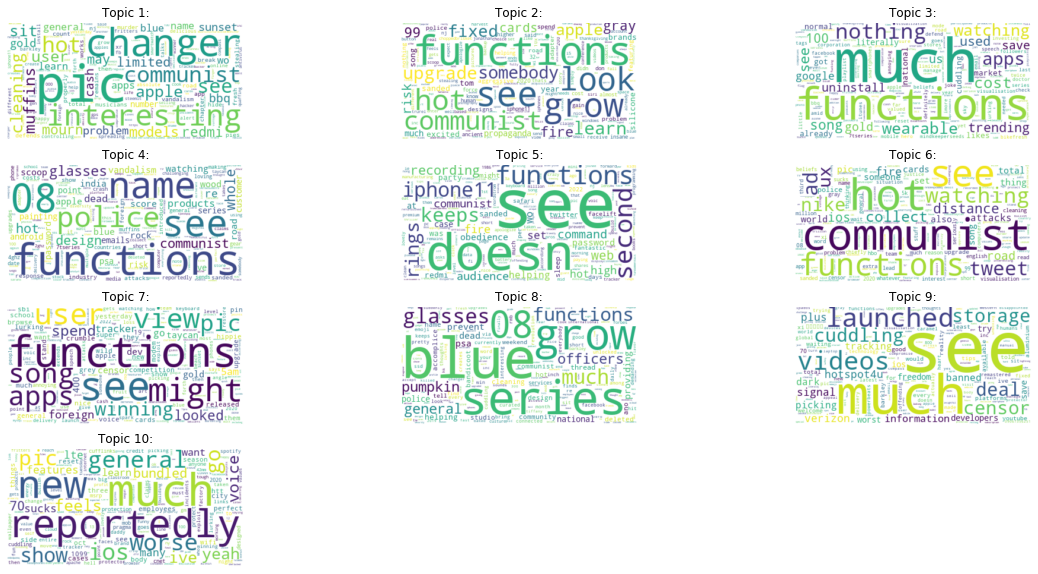

In [55]:
displayWordcloud(ldaModel, tfFeatureNames)

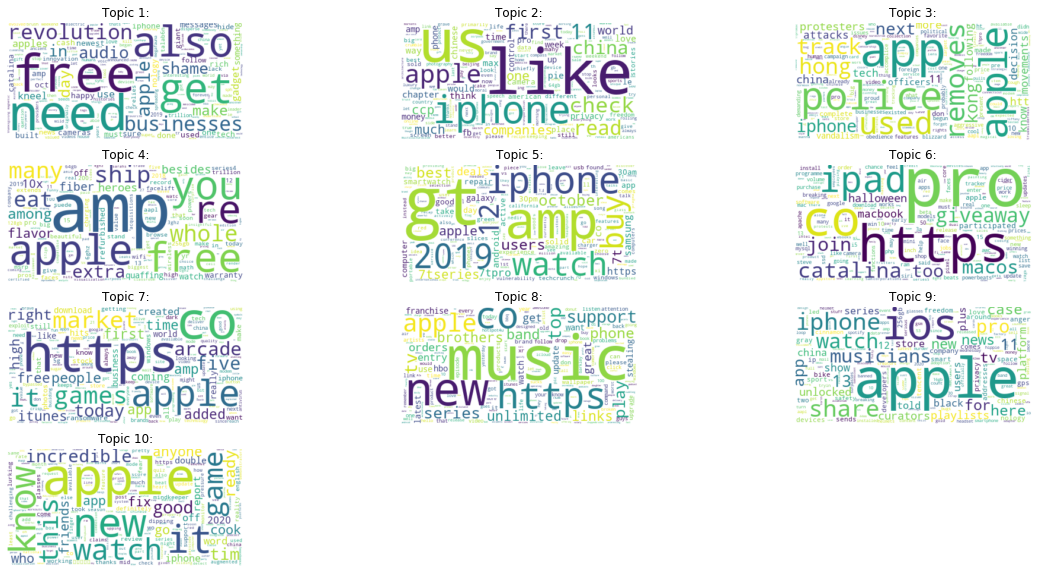

In [56]:
displayWordcloud(ldaModel1, tfFeatureNames1)